In [1]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# Dosyanızın Drive'daki yolunu buraya yazın
#Drive'dan datasetini colaba yükle.
excel_file_path = '/content/drive/MyDrive/datasett.xlsx' # Placeholder path
df = pd.read_excel(excel_file_path, engine='openpyxl')


# İlk 5 satırı göster
print("İlk 5 satır:")
print(df.head())

# Sütun bilgilerini ve data typeları göster
print("\nSütun Bilgileri:")
print(df.info())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
İlk 5 satır:
                                        Ürün Adı 2025-01-13 00:00:00  \
0                   HP 255 G9 (9M3G7AT) Notebook               13400   
1        Technopc Notebook Aura T114N37 Notebook                7400   
2          MSI Titan 18 HX A14VIG-067TR Notebook              230000   
3     MSI Stealth 18 HX AI A2XWHG-024TR Notebook                 NaN   
4  Asus ROG Strix Scar 18 G834JY-N6040W Notebook                 NaN   

  2025-01-17 00:00:00 2025-01-20 00:00:00 2025-02-02 00:00:00  \
0               13200               12500               12500   
1                7400                7400                7400   
2              220000              230000              230000   
3                 NaN                 NaN                 NaN   
4                 NaN                 NaN                 NaN   

  2025-02-07 00:00:00 2025-02-13 0

In [2]:
import pandas as pd
import numpy as np

# pandas'ın melt fonksiyonunu kullanarak DataFrame'i "geniş" formattan "uzun" formata çevir
df_long = pd.melt(df, id_vars=['Ürün Adı'], var_name='Tarih', value_name='Fiyat')


# --- Data Cleaning and Preparation ---

# 'Tarih' sütununu datetime nesnelerine dönüştür
df_long['Tarih'] = pd.to_datetime(df_long['Tarih'], errors='coerce')

# 'Fiyat' sütununu sayısal (numeric) türe dönüştür
df_long['Fiyat'] = pd.to_numeric(df_long['Fiyat'], errors='coerce')

# Fiyatı 0 olan değerleri de NaN olarak işaretle.
df_long['Fiyat'] = df_long['Fiyat'].replace(0, np.nan)


# Ürün adına ve tarihe göre sıralayalım, çünkü interpolasyon için önemli
df_long.sort_values(by=['Ürün Adı', 'Tarih'], inplace=True)

# Boş (NaN) fiyat değerlerini interpolasyon ile dolduralım
# Her ürün için ayrı ayrı interpolasyon yap
df_long['Fiyat'] = df_long.groupby('Ürün Adı')['Fiyat'].transform(lambda x: x.interpolate(method='linear', limit_direction='both'))

# Interpolasyondan sonra hala NaN kalmış olabilir (mesela bir ürünün hiç fiyatı yoksa veya tek veri noktasıysa)
# Bu satırda, interpolasyon sonrası kalan NaN değer içeren satırları siliyoruz.
df_long.dropna(subset=['Ürün Adı', 'Tarih', 'Fiyat'], inplace=True)


# Temizlenmiş ve dönüştürülmüş datanın ilk 10 satırını göster.
print("Temizlenmiş ve Dönüştürülmüş Veri (İlk 10 Satır):")
print(df_long.head(10))

# Yeni DataFrame bilgilerini döndür
print("\nDönüştürülmüş Veri Seti Bilgileri:")
df_long.info()

# Her ürün için kaç veri noktası olduğunu bul
print("\nHer Ürün İçin Veri Sayısı:")
print(df_long['Ürün Adı'].value_counts())

# Temizlenmiş dataseti yeni bir CSV dosyasına kaydet(artık bu dataseti kullanacağız)
cleaned_file_name = 'cleaned_product_prices.csv'
df_long.to_csv(cleaned_file_name, index=False)
print(f"\nTemizlenmiş veri '{cleaned_file_name}' dosyasına kaydedildi.")

Temizlenmiş ve Dönüştürülmüş Veri (İlk 10 Satır):
                                      Ürün Adı      Tarih    Fiyat
45   ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-01-13  46500.0
95   ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-01-17  46500.0
145  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-01-20  46500.0
195  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-02-02  46500.0
245  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-02-07  46500.0
295  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-02-13  46500.0
345  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-02-18  46500.0
395  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-02-22  46500.0
445  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-02-26  46500.0
495  ASUS TUF Gaming A15 (2023) FA507NUR-LP034 2025-03-03  46500.0

Dönüştürülmüş Veri Seti Bilgileri:
<class 'pandas.core.frame.DataFrame'>
Index: 2728 entries, 45 to 3051
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------

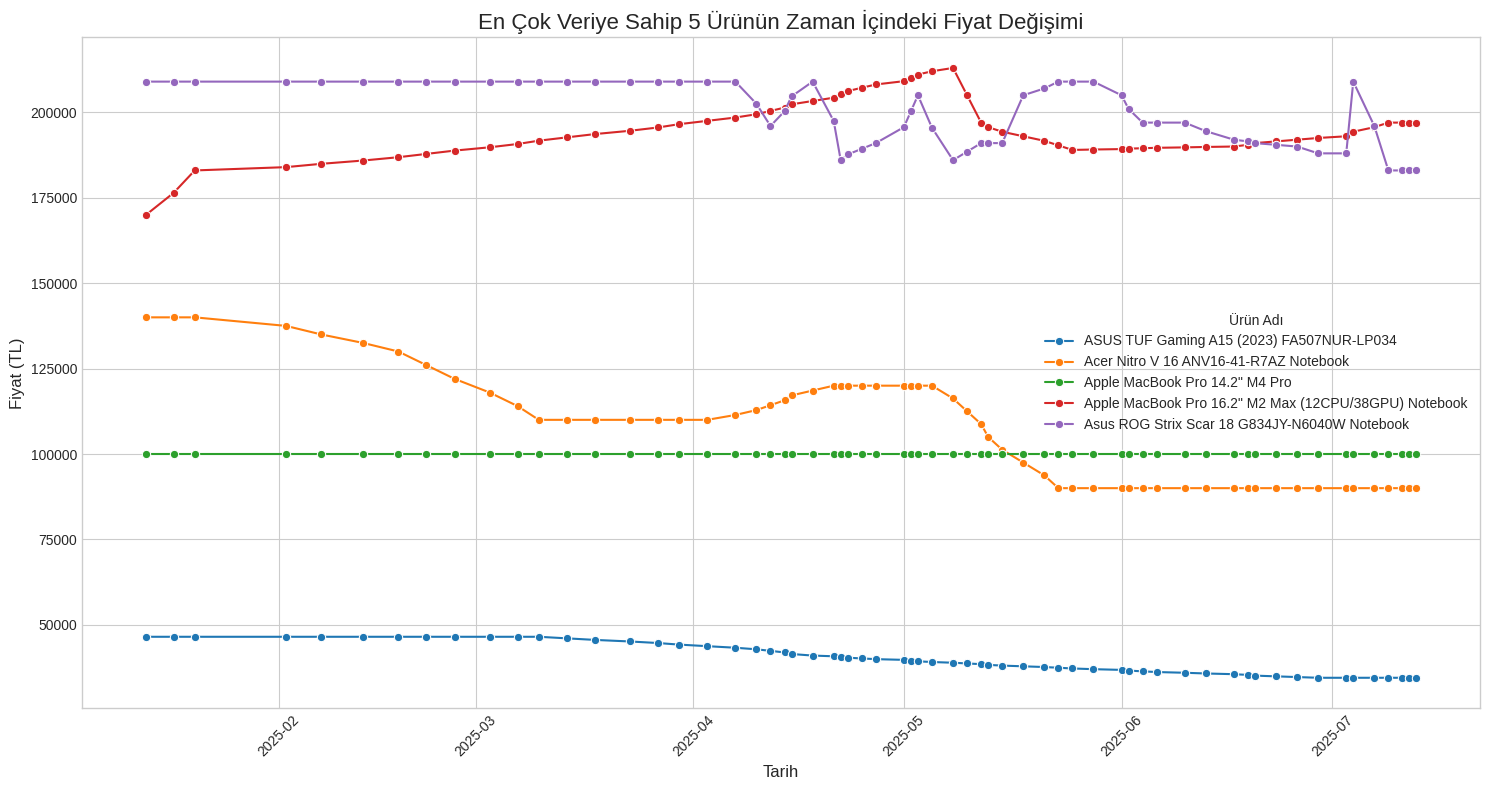

En çok veriye sahip 5 ürünün fiyat trend grafiği 'top5_products_price_trends.png' adıyla kaydedildi.


<Figure size 640x480 with 0 Axes>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Temizlenmiş veriyi yükle
cleaned_file_name = 'cleaned_product_prices.csv'
df_long = pd.read_csv(cleaned_file_name, parse_dates=['Tarih'])


# --- Visualization ---

# En çok veri noktasına sahip ilk 5 ürünü bul
top_products = df_long['Ürün Adı'].value_counts().nlargest(5).index

# DataFrame'i sadece ilk 5 ürünü içerecek şekilde filtrele
df_top_products = df_long[df_long['Ürün Adı'].isin(top_products)]

# Grafik stilini ayarla
plt.style.use('seaborn-v0_8-whitegrid')

# Grafiği oluştur
plt.figure(figsize=(15, 8))

#Çizgi grafiğini çiz
sns.lineplot(data=df_top_products, x='Tarih', y='Fiyat', hue='Ürün Adı', marker='o')

# Başlık ve etiketleri ayarla
plt.title('En Çok Veriye Sahip 5 Ürünün Zaman İçindeki Fiyat Değişimi', fontsize=16)
plt.xlabel('Tarih', fontsize=12)
plt.ylabel('Fiyat (TL)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Ürün Adı')

# Etiketlerin üst üste binmemesi için düzeni sıkılaştır
plt.tight_layout()

plt.show()
# Grafiği bir dosyaya kaydet
plt.savefig('top5_products_price_trends.png')

print("En çok veriye sahip 5 ürünün fiyat trend grafiği 'top5_products_price_trends.png' adıyla kaydedildi.")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_51ofzp1/3ajvmdz9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_51ofzp1/17z8m56t.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31288', 'data', 'file=/tmp/tmp_51ofzp1/3ajvmdz9.json', 'init=/tmp/tmp_51ofzp1/17z8m56t.json', 'output', 'file=/tmp/tmp_51ofzp1/prophet_modelf5ig2yw6/prophet_model-20250716073504.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:35:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:35:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


--- MODEL PERFORMANS METRİKLERİ (Gelişmiş Model) ---
Ortalama Mutlak Hata (MAE): 140.91 TL
Kök Ortalama Karesel Hata (RMSE): 171.16 TL
Ortalama Mutlak Yüzde Hata (MAPE): %1.08
------------------------------


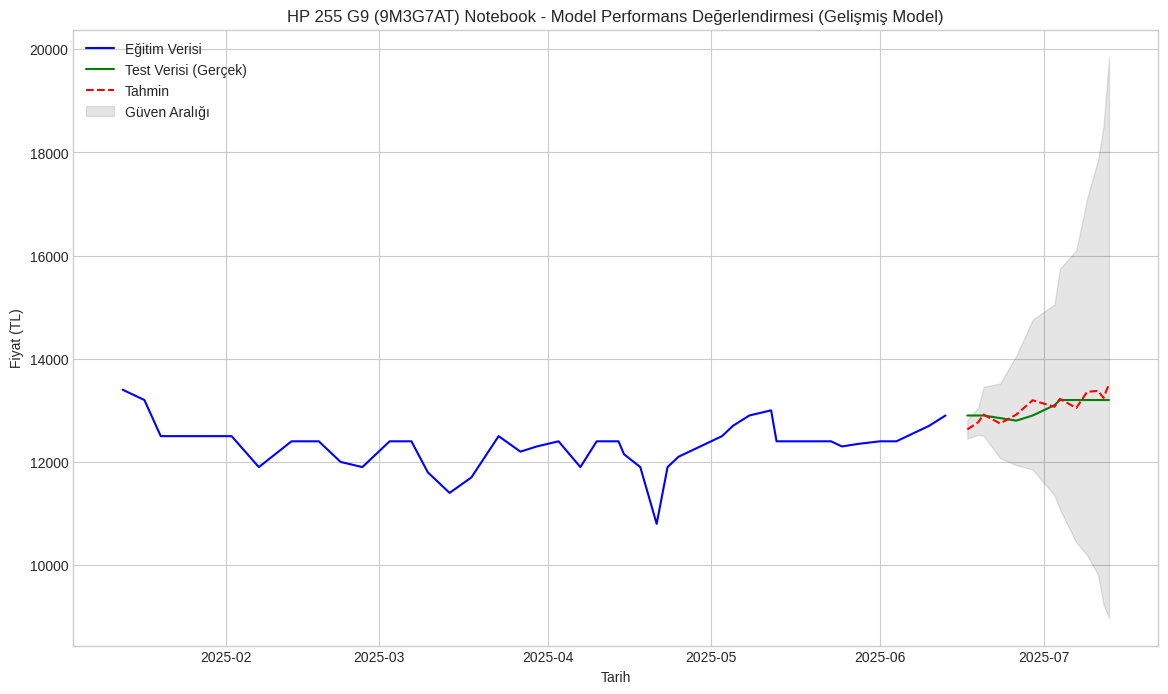

In [18]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# --- 1. Veriyi ve Tatil Bilgilerini Yükle ---
cleaned_file_name = 'cleaned_product_prices.csv'
df_long = pd.read_csv(cleaned_file_name, parse_dates=['Tarih'])
product_to_analyze = 'HP 255 G9 (9M3G7AT) Notebook'
df_product = df_long[df_long['Ürün Adı'] == product_to_analyze].copy()

# Prophet için veriyi hazırla
df_prophet = df_product[['Tarih', 'Fiyat']].rename(columns={'Tarih': 'ds', 'Fiyat': 'y'})

# Tatil DataFrame'lerini oluştur (Bu kısım sizin orijinal kodunuzda mevcut)
holidays_df = pd.DataFrame({
      'holiday': 'resmi_tatil',
      'ds': pd.to_datetime([
          '2025-01-01', '2025-04-23', '2025-05-01', '2025-05-19',
          '2025-07-15', '2025-08-30', '2025-10-29',
      ]),
      'lower_window': 0, 'upper_window': 1,
    })
bayramlar_df = pd.DataFrame({
        'holiday': 'dini_bayram',
        'ds': pd.to_datetime(['2025-03-30', '2025-03-31', '2025-04-01',
                             '2025-06-06', '2025-06-07', '2025-06-08', '2025-06-09']),
        'lower_window': -2, 'upper_window': 2,
    })
sektorel_olaylar_df = pd.DataFrame({
        'holiday': 'yeni_seri_cikisi',
        'ds': pd.to_datetime(['2024-01-08', '2024-01-17']),
        'lower_window': 0, 'upper_window': 10,
    })
all_holidays = pd.concat([holidays_df, bayramlar_df, sektorel_olaylar_df])


# --- 2. Veriyi Eğitim ve Test Olarak Ayır (%80 Eğitim, %20 Test) ---
split_point = int(len(df_prophet) * 0.8)
train_data = df_prophet.iloc[:split_point]
test_data = df_prophet.iloc[split_point:]


# --- 3. Modeli SADECE Eğitim Verisiyle Kur ve Eğit (SİZİN MODELİNİZLE) ---
train_data_log = train_data.copy()
train_data_log['y'] = np.log(train_data_log['y'])

# Prophet modelini sizin belirlediğiniz gelişmiş parametrelerle kuruyoruz
model_eval = Prophet(
    holidays=all_holidays,                 # Tatil verilerini ekledik
    seasonality_mode='multiplicative',   # Mevsimsellik modunu 'multiplicative' olarak belirttik
    changepoint_prior_scale=0.1          # Esneklik parametresini sizin değerinize göre ayarladık
)
model_eval.fit(train_data_log)


# --- 4. Test Verisi Üzerinde Tahmin Yap ve Değerlendir ---
future_eval = test_data[['ds']]
forecast_eval = model_eval.predict(future_eval)

# Tahminleri orijinal ölçeğe geri çevir
forecast_eval['yhat'] = np.exp(forecast_eval['yhat'])
forecast_eval['yhat_lower'] = np.exp(forecast_eval['yhat_lower'])
forecast_eval['yhat_upper'] = np.exp(forecast_eval['yhat_upper'])

# Performans metriklerini hesapla
eval_df = pd.merge(test_data, forecast_eval[['ds', 'yhat']], on='ds')
mae = mean_absolute_error(eval_df['y'], eval_df['yhat'])
rmse = np.sqrt(mean_squared_error(eval_df['y'], eval_df['yhat']))
mape = np.mean(np.abs((eval_df['y'] - eval_df['yhat']) / eval_df['y'])) * 100

print("--- MODEL PERFORMANS METRİKLERİ (Gelişmiş Model) ---")
print(f"Ortalama Mutlak Hata (MAE): {mae:,.2f} TL")
print(f"Kök Ortalama Karesel Hata (RMSE): {rmse:,.2f} TL")
print(f"Ortalama Mutlak Yüzde Hata (MAPE): %{mape:.2f}")
print("-" * 30)

# Sonuçları görselleştir
plt.figure(figsize=(14, 8))
plt.plot(train_data['ds'], train_data['y'], 'b-', label='Eğitim Verisi')
plt.plot(test_data['ds'], test_data['y'], 'g-', label='Test Verisi (Gerçek)')
plt.plot(forecast_eval['ds'], forecast_eval['yhat'], 'r--', label='Tahmin')
plt.fill_between(forecast_eval['ds'], forecast_eval['yhat_lower'], forecast_eval['yhat_upper'], color='k', alpha=0.1, label='Güven Aralığı')
plt.title(f'{product_to_analyze} - Model Performans Değerlendirmesi (Gelişmiş Model)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (TL)')
plt.legend()
plt.grid(True)
plt.show()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_51ofzp1/ihlxqb11.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_51ofzp1/d1ooh15e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64585', 'data', 'file=/tmp/tmp_51ofzp1/ihlxqb11.json', 'init=/tmp/tmp_51ofzp1/d1ooh15e.json', 'output', 'file=/tmp/tmp_51ofzp1/prophet_modeltp98n39c/prophet_model-20250716071545.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:15:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


'HP 255 G9 (9M3G7AT) Notebook' için veri hazırlanıyor...
            ds         y
806 2025-01-13  9.503010
807 2025-01-17  9.487972
808 2025-01-20  9.433484
809 2025-02-02  9.433484
810 2025-02-07  9.384294


07:15:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Tahmin sonuçları oluşturuluyor ve grafik çiziliyor...
           ds          yhat    yhat_lower    yhat_upper
87 2025-08-08  13628.953471  11166.481314  16834.735074
88 2025-08-09  13571.836369  10935.820120  16995.648178
89 2025-08-10  13704.796408  10940.282029  17331.441700
90 2025-08-11  13510.334892  10651.726253  17269.450326
91 2025-08-12  13588.307884  10590.953179  17590.929972


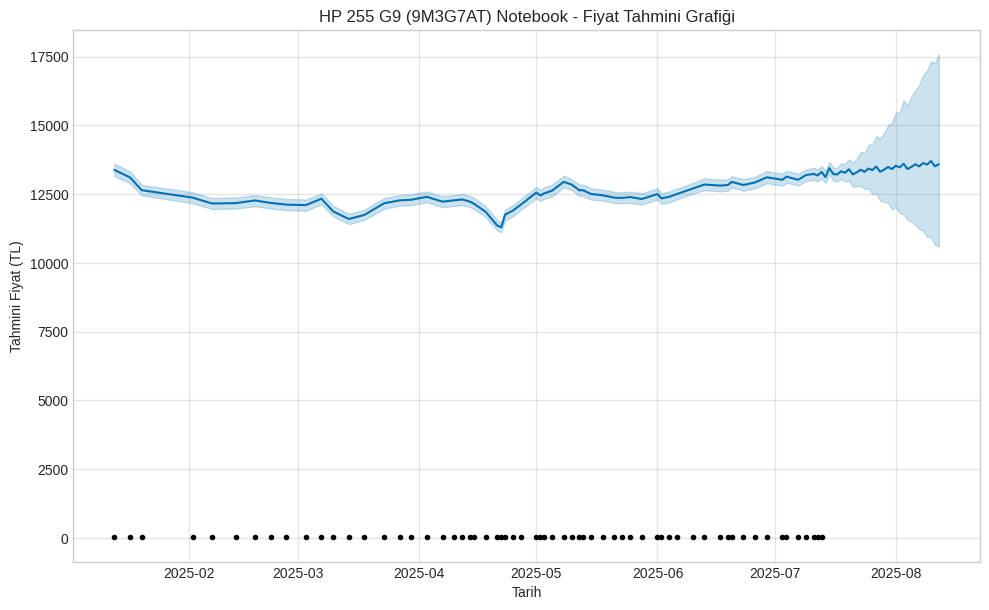

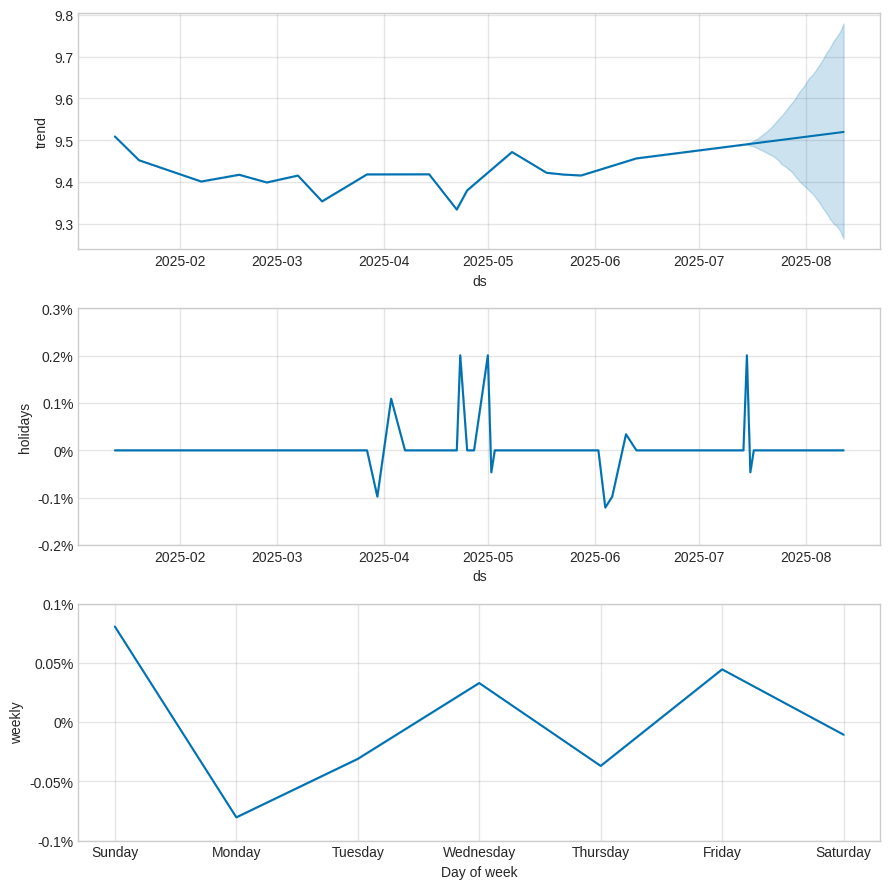

In [11]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

# Temizlenmiş veriyi yükle
cleaned_file_name = 'cleaned_product_prices.csv'
df_long = pd.read_csv(cleaned_file_name, parse_dates=['Tarih'])

# Analiz edilecek ürünü seç
product_to_analyze = 'HP 255 G9 (9M3G7AT) Notebook'
df_product = df_long[df_long['Ürün Adı'] == product_to_analyze].copy()


# --- Prophet için Veriyi Hazırlama ---

# Prophet, sütunların 'ds' (datestamp) ve 'y' (value) olarak adlandırılmasını bekler.
df_prophet = df_product[['Tarih', 'Fiyat']].rename(columns={'Tarih': 'ds', 'Fiyat': 'y'})

# logaritmik dönüşüm uygula
df_prophet['y'] = np.log(df_prophet['y']) # Logaritmik dönüşüm burada!


# 2025 için Türkiye'deki resmi ve özel günleri içeren kapsamlı bir liste
holidays_df = pd.DataFrame({
      'holiday': 'resmi_tatil',
      'ds': pd.to_datetime([
          '2025-01-01', # Yılbaşı
          '2025-04-23', # Ulusal Egemenlik ve Çocuk Bayramı
          '2025-05-01', # Emek ve Dayanışma Günü
          '2025-05-19', # Atatürk'ü Anma, Gençlik ve Spor Bayramı
          '2025-07-15', # Demokrasi ve Milli Birlik Günü
          '2025-08-30', # Zafer Bayramı
          '2025-10-29', # Cumhuriyet Bayramı
      ]),
      'lower_window': 0,
      'upper_window': 1,
    })

# Dini bayramlar
bayramlar_df = pd.DataFrame({
        'holiday': 'dini_bayram',
        'ds': pd.to_datetime(['2025-03-30', '2025-03-31', '2025-04-01', # Ramazan Bayramı
                             '2025-06-06', '2025-06-07', '2025-06-08', '2025-06-09']), # Kurban Bayramı
        'lower_window': -2, # Etkisi 2 gün önce başlasın
        'upper_window': 2,  # 2 gün sonraya kadar sürsün
    })

# Sektörel olaylar (yeni teknoloji çıkışı gibi)
sektorel_olaylar_df = pd.DataFrame({
        'holiday': 'yeni_seri_cikisi',
        'ds': pd.to_datetime([
            '2024-01-08', # Intel 14. Nesil mobil işlemci duyurusu
            '2024-01-17', # NVIDIA RTX 40 Super serisi çıkışı
        ]),
        'lower_window': 0,
        'upper_window': 10, # Etkisi 10 gün sürebilir
    })

# Tüm listeleri birleştir
all_holidays = pd.concat([holidays_df, bayramlar_df, sektorel_olaylar_df])

print(f"'{product_to_analyze}' için veri hazırlanıyor...")
print(df_prophet.head())


# ---Prophet Modelini Kurma---
# Fiyat verisi olduğu için 'multiplicative' mevsimsellik daha iyi sonuç verebilir
model = Prophet(
    holidays=all_holidays,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.1 # Trend esnekliği
    )

# Modeli Eğitme
model.fit(df_prophet)

# --- Gelecek Tahmini Yapma ---
# Tahmin yapılacak gelecek zaman dilimini oluştur (örneğin 30 gün)
future = model.make_future_dataframe(periods=30)

# Tahmin yap
forecast = model.predict(future)

# Logaritmik dönüşümün etkilerini gidermek için tahminleri geri dönüştürelim (np.exp)
forecast['yhat'] = np.exp(forecast['yhat'])
forecast['yhat_lower'] = np.exp(forecast['yhat_lower'])
forecast['yhat_upper'] = np.exp(forecast['yhat_upper'])

# Ayrıca gerçek veriyi de geri dönüştürelim (anomali tespiti için)
df_prophet['y'] = np.exp(df_prophet['y'])

print("\nTahmin sonuçları oluşturuluyor ve grafik çiziliyor...")

# Tahminin ilk birkaç satırını göster
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail())

# Prophet'in plot fonksiyonu ile tahmini çizdir
fig = model.plot(forecast)
plt.title(f'{product_to_analyze} - Fiyat Tahmini Grafiği')
plt.xlabel('Tarih')
plt.ylabel('Tahmini Fiyat (TL)')
plt.show()

# Prophet'in trend, haftalık ve yıllık mevsimsellik gibi bileşenleri
# ayrı ayrı çizdirmesini sağlayan fonksiyon
fig2 = model.plot_components(forecast)
plt.show()

--- Anomali Tespiti Sonuçları (Potansiyel İndirim Günleri) ---
Aşağıdaki tarihlerde beklenmedik fiyat düşüşleri tespit edildi:
           ds        y    yhat_lower
4  2025-02-07  11900.0  11957.139993
18 2025-04-07  11900.0  12020.393550
24 2025-04-21  10800.0  11174.484638
36 2025-05-13  12400.0  12423.963697


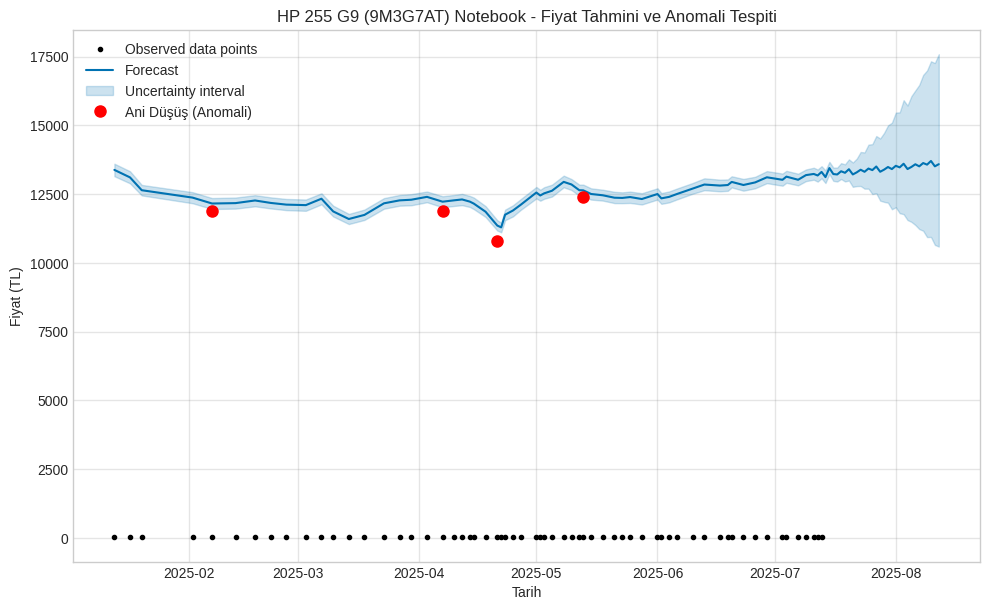

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# --- Anomali Tespiti ---

# Gerçek verileri (df_prophet) ve tahminleri (forecast) birleştirelim.
performance = pd.merge(df_prophet, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')

# Anomaliyi belirle: Gerçek fiyat (y), tahminin alt sınırından (yhat_lower) daha düşük mü?
# Modelin hatasını (artık değerleri) hesapla
performance['error'] = performance['y'] - performance['yhat']

# Hataların ortalamasını ve standart sapmasını bul
error_mean = performance['error'].mean()
error_std = performance['error'].std()
# Not: Standart sapma, hataların ortalamadan ne kadar saptığının bir ölçüsüdür.

# Anomaliyi yeniden tanımla:
# Hata, ortalamadan 'N' standart sapma daha düşükse bu bir anomalidir.
N = 1.5
performance['anomaly'] = performance['error'] < (error_mean - N * error_std)

# Anomali olarak tespit edilen tarihleri bul
anomalies = performance[performance['anomaly'] == True]

print("--- Anomali Tespiti Sonuçları (Potansiyel İndirim Günleri) ---")
if anomalies.empty:
    print("Modelin beklentisinin altında ani bir fiyat düşüşü (anomali) tespit edilmedi.")
else:
    print("Aşağıdaki tarihlerde beklenmedik fiyat düşüşleri tespit edildi:")
    print(anomalies[['ds', 'y', 'yhat_lower']])

# --- Anomali Görselleştirme ---

# Tahmin grafiğini yeniden çizdir
fig = model.plot(forecast) # model.plot() fonksiyonu da tahminleri geri dönüştürülmüş olarak alır

# Grafik üzerine anomalileri kırmızı noktalarla ekle
plt.plot(anomalies['ds'], anomalies['y'], 'ro', markersize=8, label='Ani Düşüş (Anomali)')

plt.title(f'{product_to_analyze} - Fiyat Tahmini ve Anomali Tespiti')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (TL)')
plt.legend()
plt.show()

In [13]:
import pandas as pd

# --- Rapor Üretimi ---

# Son bilinen gerçek fiyatı alalım
last_real_price = df_prophet['y'].iloc[-1]
last_real_date = df_prophet['ds'].iloc[-1]

# Tahmin döneminin sonundaki (30 gün sonraki) tahmini fiyatı alalım
predicted_price_in_30_days = forecast['yhat'].iloc[-1]
predicted_date = forecast['ds'].iloc[-1]

# Yüzdelik değişimi hesaplayalım
percentage_change = ((predicted_price_in_30_days - last_real_price) / last_real_price) * 100

# Raporu oluştur
print("="*60)
print(f"ÜRÜN BAZLI FİYAT TAHMİNİ VE TREND ANALİZİ RAPORU")
print("="*60)
print(f"Analiz Edilen Ürün: {product_to_analyze}\n")

print("--- GELECEK FİYAT TAHMİNİ (Önümüzdeki 30 Gün) ---")
print(f"Son bilinen fiyat ({last_real_date.strftime('%Y-%m-%d')}): {last_real_price:,.2f} TL")
print(f"Tahmin edilen fiyat ({predicted_date.strftime('%Y-%m-%d')}): {predicted_price_in_30_days:,.2f} TL")

if percentage_change > 0:
    print(f"Tahmin: Bu ürünün fiyatının önümüzdeki 30 gün içinde yaklaşık %{abs(percentage_change):.2f} artması bekleniyor. 📈")
else:
    print(f"Tahmin: Bu ürünün fiyatının önümüzdeki 30 gün içinde yaklaşık %{abs(percentage_change):.2f} düşmesi bekleniyor. 📉")
print("\n")


print("--- GEÇMİŞ KAMPANYA DÖNEMİ ANALİZİ (Anomali Tespiti) ---")
if anomalies.empty:
    print("Geçmiş verilerde kayda değer bir kampanya veya ani fiyat düşüşü tespit edilmedi.")
else:
    print("Model, aşağıdaki tarihlerde standart trendin dışında ani fiyat düşüşleri tespit etti:")
    for index, row in anomalies.iterrows():
        date_str = row['ds'].strftime('%Y-%m-%d')
        real_price = row['y']
        expected_lower_price = row['yhat_lower']
        print(f"  - {date_str}: Fiyat {real_price:,.2f} TL'ye düştü. (Beklenen en düşük fiyat {expected_lower_price:,.2f} TL idi)")
print("\n")
print("="*60)
print("Rapor Sonu.")
print("="*60)

ÜRÜN BAZLI FİYAT TAHMİNİ VE TREND ANALİZİ RAPORU
Analiz Edilen Ürün: HP 255 G9 (9M3G7AT) Notebook

--- GELECEK FİYAT TAHMİNİ (Önümüzdeki 30 Gün) ---
Son bilinen fiyat (2025-07-13): 13,200.00 TL
Tahmin edilen fiyat (2025-08-12): 13,588.31 TL
Tahmin: Bu ürünün fiyatının önümüzdeki 30 gün içinde yaklaşık %2.94 artması bekleniyor. 📈


--- GEÇMİŞ KAMPANYA DÖNEMİ ANALİZİ (Anomali Tespiti) ---
Model, aşağıdaki tarihlerde standart trendin dışında ani fiyat düşüşleri tespit etti:
  - 2025-02-07: Fiyat 11,900.00 TL'ye düştü. (Beklenen en düşük fiyat 11,957.14 TL idi)
  - 2025-04-07: Fiyat 11,900.00 TL'ye düştü. (Beklenen en düşük fiyat 12,020.39 TL idi)
  - 2025-04-21: Fiyat 10,800.00 TL'ye düştü. (Beklenen en düşük fiyat 11,174.48 TL idi)
  - 2025-05-13: Fiyat 12,400.00 TL'ye düştü. (Beklenen en düşük fiyat 12,423.96 TL idi)


Rapor Sonu.


In [14]:
!pip install streamlit pandas prophet matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 72.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [15]:
# Gerekli kütüphaneleri yükle(uygulama için)
!pip install streamlit pyngrok -q

In [16]:
# Streamlit uygulama kodunu app.py dosyasına yazın
%%writefile app.py

import streamlit as st
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np

# --- Sayfa Ayarları ve Başlık ---
st.set_page_config(page_title="E-Ticaret Fiyat Analizi", layout="wide")
st.title("🛍️ E-Ticaret Ürünleri İçin Fiyat Tahmini ve Trend Analizi")
st.write("Bu uygulama, seçilen bir ürünün geçmiş fiyat verilerini analiz eder, gelecekteki 30 gün için fiyat tahmini yapar ve potansiyel kampanya dönemlerini tespit eder.")

# --- Veriyi Yükleme ve Önbelleğe Alma ---\
@st.cache_data
def load_data():
    try:
        df = pd.read_csv('cleaned_product_prices.csv', parse_dates=['Tarih'])
        return df
    except FileNotFoundError:
        return None

df_long = load_data()

if df_long is None:
    st.error("HATA: 'cleaned_product_prices.csv' dosyası bulunamadı. Lütfen sol taraftaki 'Dosyalar' bölümüne yüklediğinizden emin olun.")
    st.stop()

# --- Kullanıcıdan Ürün Seçimini Alma (Sidebar) ---
st.sidebar.header("Analiz Ayarları")
product_list = df_long['Ürün Adı'].unique()
selected_product = st.sidebar.selectbox(
    "Lütfen analiz etmek için bir ürün seçin:",
    product_list
)

# --- Analiz Fonksiyonu ---
@st.cache_data
def run_analysis(product_name):
    df_product = df_long[df_long['Ürün Adı'] == product_name].copy()
    df_prophet = df_product[['Tarih', 'Fiyat']].rename(columns={'Tarih': 'ds', 'Fiyat': 'y'})

    if len(df_prophet) < 5:
        return None, None, None, "Bu ürünün analizi için yeterli veri (en az 5 nokta) bulunmamaktadır."

    # Fiyat sütununda sıfır veya negatif değer olmadığından emin olun ve log dönüşümü için küçük bir sabit ekleyin
    min_val_for_log = 1
    df_prophet['y'] = df_prophet['y'] + min_val_for_log
    df_prophet['y'] = np.log(df_prophet['y'])


    model = Prophet(changepoint_prior_scale=0.05,
                    yearly_seasonality=False,
                    weekly_seasonality=True,
                    daily_seasonality=False)
    model.fit(df_prophet)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)

    # Tahminleri orijinal fiyat ölçeğine geri çevir ve eklenen sabiti geri çıkar
    forecast['yhat'] = np.exp(forecast['yhat']) - min_val_for_log
    forecast['yhat_lower'] = np.exp(forecast['yhat_lower']) - min_val_for_log
    forecast['yhat_upper'] = np.exp(forecast['yhat_upper']) - min_val_for_log

    # Fiyatların negatif olmamasını garanti altına almak için 0 ile sınırla
    forecast['yhat'] = forecast['yhat'].clip(lower=0)
    forecast['yhat_lower'] = forecast['yhat_lower'].clip(lower=0)
    forecast['yhat_upper'] = forecast['yhat_upper'].clip(lower=0)


    # Anomali tespiti için df_product'taki orijinal Fiyat değerlerini kullanıyoruz
    original_prices_for_performance = df_product[['Tarih', 'Fiyat']].rename(columns={'Tarih': 'ds', 'Fiyat': 'y'})


    performance = pd.merge(original_prices_for_performance, forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']], on='ds')
    performance['anomaly'] = performance.apply(lambda rows: rows['y'] < rows['yhat_lower'], axis=1)
    anomalies = performance[performance['anomaly'] == True]

    # Grafiği çizerken geri dönüştürülmüş forecast ve anomalies verilerini kullanın
    fig1 = model.plot(forecast)
    plt.plot(anomalies['ds'], anomalies['y'], 'ro', markersize=8, label='Ani Düşüş (Anomali)')
    plt.title(f'{product_name} - Fiyat Tahmini ve Anomali Tespiti', fontsize=16)
    plt.xlabel('Tarih')
    plt.ylabel('Fiyat (TL)')
    plt.legend()

    # Raporlama için son gerçek fiyatı df_product'tan al
    last_real_price = df_product['Fiyat'].iloc[-1]
    last_real_date = df_product['Tarih'].iloc[-1]
    predicted_price_in_30_days = forecast['yhat'].iloc[-1]

    # Yüzdelik değişimi hesaplarken, 0'a bölme hatasını önlemek için kontrol ekleyin
    if last_real_price == 0:
        percentage_change = float('inf') if predicted_price_in_30_days > 0 else 0
    else:
        percentage_change = ((predicted_price_in_30_days - last_real_price) / last_real_price) * 100

    # Rapor metnini satır satır listeleyip birleştirerek daha sağlam Markdown çıktısı alalım
    report_lines = []
    report_lines.append("### 📈 Gelecek Fiyat Tahmini (Önümüzdeki 30 Gün)")
    report_lines.append(f"- **Son bilinen fiyat ({last_real_date.strftime('%Y-%m-%d')}):** `{last_real_price:,.2f} TL`")
    report_lines.append(f"- **30 gün sonrası için tahmin edilen fiyat:** `{predicted_price_in_30_days:,.2f} TL`")
    report_lines.append(f"- **Tahmin:** Bu ürünün fiyatının önümüzdeki 30 gün içinde yaklaşık **`%{percentage_change:.2f}`** oranında değişmesi bekleniyor.")
    report_text = "\n".join(report_lines) # Satırları \n ile birleştir

    anomaly_text_lines = []
    anomaly_text_lines.append("### 📉 Geçmiş Kampanya Dönemi Analizi")
    if anomalies.empty:
        anomaly_text_lines.append("Geçmiş verilerde kayda değer bir kampanya veya ani fiyat düşüşü tespit edilmedi.")
    else:
        anomaly_text_lines.append("Model, aşağıdaki tarihlerde standart trendin dışında ani fiyat düşüşleri tespit etti:")
        for _, row in anomalies.iterrows():
            anomaly_text_lines.append(f"- **{row['ds'].strftime('%Y-%m-%d')}:** Fiyat `{row['y']:,.2f} TL`'ye düştü (Beklenen en düşük fiyat `{row['yhat_lower']:,.2f} TL` idi).")

    anomaly_text = "\n".join(anomaly_text_lines) # Satırları \n ile birleştir

    final_report = report_text + "\n\n" + anomaly_text # İki \n ile yeni paragraf oluştur
    return fig1, final_report, df_product.sort_values(by='Tarih', ascending=False), None

# --- Seçilen Ürüne Göre Analizi Çalıştırma ve Sonuçları Gösterme ---
if selected_product:
    st.header(f"🔎 Analiz Sonuçları: {selected_product}")
    fig, report, df_history, error_message = run_analysis(selected_product)
    if error_message:
        st.warning(error_message)
    else:
        st.markdown(report)
        st.pyplot(fig)
        with st.expander("Geçmiş Fiyat Verilerini Görüntüle"):
            st.dataframe(df_history)

Writing app.py


In [17]:
# ngrok kimliğini ile uygulamayı çalıştır
from pyngrok import ngrok
from google.colab import userdata
import os

try:
    NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')
    ngrok.set_auth_token(NGROK_AUTH_TOKEN)
    print("Ngrok kimlik doğrulaması başarılı.")

    # Streamlit'in çalıştığı varsayılan port olan 8501'i ngrok'a yönlendir
    public_url = ngrok.connect(8501)
    print(f"Uygulamaya erişmek için bu linke tıklayın: {public_url}")

    # app.py dosyasının varlığını kontrol et
    if not os.path.exists('app.py'):
        print("\nUYARI: 'app.py' dosyası bulunamadı. Lütfen bir önceki adımdaki '%%writefile app.py' hücresini tekrar çalıştırdığınızdan emin olun.")
    else:
        # Uygulamayı arka planda çalıştır
        !streamlit run app.py &

except Exception as e:
    print(f"\nBir hata oluştu: {e}")
    print("\nLütfen Adım B'yi (Colab Secrets/Gizlilik) doğru yaptığınızdan emin olun. 'NGROK_AUTH_TOKEN' isminin doğru yazıldığını ve anahtarı yapıştırdığınızı kontrol edin.")

Ngrok kimlik doğrulaması başarılı.
Uygulamaya erişmek için bu linke tıklayın: NgrokTunnel: "https://101a9dfb2f84.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.56.13.222:8501

07:17:34 - cmdstanpy - INFO - Chain [1] start processing
07:17:34 - cmdstanpy - INFO - Chain [1] done processing
07:17:59 - cmdstanpy - INFO - Chain [1] start processing
07:17:59 - cmdstanpy - INFO - Chain [1] done processing
07:18:36 - cmdstanpy - INFO - Chain [1] start processing
07:18:36 - cmdstanpy - INFO - Chain [1] done processing
  Stopping...
